## Final Project: Bankruptcy Analysis
#### By: Keegan Henderson & Brandon Thomas

In [60]:
#Libraries
from scipy.io import arff

import pandas as pd

import seaborn as sns

import numpy as np

import matplotlib.pyplot as plt

## Section 1: Cleaning and Organizing Data

### Transforming the data from arff -> a dataframe

In [28]:
# Loading the arff files into the workspace

AData1 = arff.loadarff('1year.arff')
AData2 = arff.loadarff('2year.arff')
AData3 = arff.loadarff('3year.arff')
AData4 = arff.loadarff('4year.arff')
AData5 = arff.loadarff('5year.arff')

In [29]:
#loading the arff files (from workspace) into a dataframe (within the workspace)

df1 = pd.DataFrame(AData1[0])
df2 = pd.DataFrame(AData2[0])
df3 = pd.DataFrame(AData3[0])
df4 = pd.DataFrame(AData4[0])
df5 = pd.DataFrame(AData5[0])

In [30]:
#checking arff files did get transformed dataframe
df1.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,b'0'
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,b'0'
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,b'0'
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,b'0'
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,b'0'


## Naming Columns

In [31]:
df1.columns

Index(['Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5', 'Attr6', 'Attr7', 'Attr8',
       'Attr9', 'Attr10', 'Attr11', 'Attr12', 'Attr13', 'Attr14', 'Attr15',
       'Attr16', 'Attr17', 'Attr18', 'Attr19', 'Attr20', 'Attr21', 'Attr22',
       'Attr23', 'Attr24', 'Attr25', 'Attr26', 'Attr27', 'Attr28', 'Attr29',
       'Attr30', 'Attr31', 'Attr32', 'Attr33', 'Attr34', 'Attr35', 'Attr36',
       'Attr37', 'Attr38', 'Attr39', 'Attr40', 'Attr41', 'Attr42', 'Attr43',
       'Attr44', 'Attr45', 'Attr46', 'Attr47', 'Attr48', 'Attr49', 'Attr50',
       'Attr51', 'Attr52', 'Attr53', 'Attr54', 'Attr55', 'Attr56', 'Attr57',
       'Attr58', 'Attr59', 'Attr60', 'Attr61', 'Attr62', 'Attr63', 'Attr64',
       'class'],
      dtype='object')

In [32]:
def RenameCol(dataframe):
    count = 1
    cNames = []
    cNamesString = []
    
    #creates a list of numbered ints from 1-end(65) of column.
    for c in dataframe.columns:
        cNames.append(count)
        count = count + 1
    
    #changes the list above to strings (so can assign to dataframe.columns)
    for item in cNames:
        cNamesString.append(str(item))
    
    #Assigning columns to dataframe
    dataframe.columns = cNamesString

In [33]:
#Applying above function to rename columns 0-65

RenameCol(df1)
RenameCol(df2)
RenameCol(df3)
RenameCol(df4)
RenameCol(df5)

In [34]:
df1.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37',
       '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49',
       '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61',
       '62', '63', '64', '65'],
      dtype='object')

In [35]:
#sampling dataframe to see syntax of missing data for best method of removal
df1

,1,2,3,4,5,6,7,8,9,10,...,56,57,58,59,60,61,62,63,64,65
0,0.200550,0.37951,0.39641,2.04720,32.3510,0.388250,0.249760,1.330500,1.13890,0.504940,...,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.42770,b'0'
1,0.209120,0.49988,0.47225,1.94470,14.7860,0.000000,0.258340,0.996010,1.69960,0.497880,...,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.98700,b'0'
2,0.248660,0.69592,0.26713,1.55480,-1.1523,0.000000,0.309060,0.436950,1.30900,0.304080,...,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.20780,b'0'
3,0.081483,0.30734,0.45879,2.49280,51.9520,0.149880,0.092704,1.866100,1.05710,0.573530,...,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.54970,b'0'
4,0.187320,0.61323,0.22960,1.40630,-7.3128,0.187320,0.187320,0.630700,1.15590,0.386770,...,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.89800,b'0'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7022,0.018371,0.47410,-0.13619,0.60839,-18.4490,0.018371,0.018371,0.972030,1.01210,0.460840,...,0.011909,0.039866,0.98809,0.274140,73.5050,79.2370,31.268,11.6730,5.14890,b'1'
7023,-0.013359,0.58354,-0.02265,0.92896,-42.2320,-0.013359,-0.015036,0.562890,0.98904,0.328470,...,-0.011082,-0.040671,1.01110,0.805920,10.5990,7.1740,94.092,3.8792,1.75720,b'1'
7024,0.006338,0.50276,0.43923,1.87360,9.7417,0.006338,0.012022,0.983560,1.00830,0.494490,...,0.008258,0.012817,0.99174,0.000000,10.4700,6.0759,51.019,7.1542,62.00100,b'1'
7025,-0.041643,0.84810,-0.12852,0.57485,-121.9200,0.000000,-0.036795,0.179010,0.42138,0.151820,...,-0.232720,-0.274290,0.98788,3.593100,39.7030,3.1420,261.850,1.3939,0.51005,b'1'


## Replacing na's with mean of column

In [36]:
#shows all the columns with na's 
pd.set_option('display.max_rows', None)

#change number of df1 for different dataframes (1-5)
print(df1.isna().sum())
pd.set_option('display.max_rows', 10)

1        3
2        3
3        3
4       30
5        8
6        3
7        3
8       25
9        1
10       3
11      39
12      30
13       0
14       3
15       2
16      25
17      25
18       3
19       0
20       0
21    1622
22       3
23       0
24     124
25       3
26      25
27     311
28      34
29       3
30       0
31       0
32      38
33      30
34      25
35       3
36       3
37    2740
38       3
39       0
40      30
41      84
42       0
43       0
44       0
45     134
46      31
47      29
48       3
49       0
50      25
51       3
52      29
53      34
54      34
55       0
56       0
57       1
58       0
59       1
60     135
61      22
62       0
63      30
64      34
65       0
dtype: int64


In [37]:
# function of mean to each column
def replace_na(df): 
    df[df.columns] = df[df.columns].fillna(value=df[df.columns].mean())
    return df

In [38]:
replace_na(df1)
replace_na(df2)
replace_na(df3)
replace_na(df4)
replace_na(df5)

,1,2,3,4,5,6,7,8,9,10,...,56,57,58,59,60,61,62,63,64,65
0,0.088238,0.55472,0.011340,1.02050,-66.5200,0.342040,0.109490,0.57752,1.08810,0.320360,...,0.080955,0.275430,0.91905,0.002024,7.2711,4.7343,142.760,2.5568,3.25970,b'0'
1,-0.006202,0.48465,0.232980,1.59980,6.1825,0.000000,-0.006202,1.06340,1.27570,0.515350,...,-0.028591,-0.012035,1.00470,0.152220,6.0911,3.2749,111.140,3.2841,3.37000,b'0'
2,0.130240,0.22142,0.577510,3.60820,120.0400,0.187640,0.162120,3.05900,1.14150,0.677310,...,0.123960,0.192290,0.87604,0.000000,8.7934,2.9870,71.531,5.1027,5.61880,b'0'
3,-0.089951,0.88700,0.269270,1.52220,-55.9920,-0.073957,-0.089951,0.12740,1.27540,0.113000,...,0.418840,-0.796020,0.59074,2.878700,7.6524,3.3302,147.560,2.4735,5.92990,b'0'
4,0.048179,0.55041,0.107650,1.24370,-22.9590,0.000000,0.059280,0.81682,1.51500,0.449590,...,0.240400,0.107160,0.77048,0.139380,10.1180,4.0950,106.430,3.4294,3.36220,b'0'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,0.012898,0.70621,0.038857,1.17220,-18.9070,0.000000,0.013981,0.41600,1.67680,0.293790,...,0.020169,0.043904,1.01220,1.259400,13.4720,12.4320,49.117,7.4313,2.27990,b'1'
5906,-0.578050,0.96702,-0.800850,0.16576,-67.3650,-0.578050,-0.578050,-0.40334,0.93979,-0.390040,...,-0.064073,1.482000,1.06410,-0.018084,110.7200,44.7590,81.220,4.4940,5.13050,b'1'
5907,-0.179050,1.25530,-0.275990,0.74554,-120.4400,-0.179050,-0.154930,-0.26018,1.17490,-0.326590,...,0.148880,0.548240,0.85112,-0.522430,9.8526,3.4892,207.870,1.7559,9.95270,b'1'
5908,-0.108860,0.74394,0.015449,1.08780,-17.0030,-0.108860,-0.109180,0.12531,0.84516,0.093224,...,-0.183200,-1.167700,1.18320,6.092400,13.8860,6.0769,83.122,4.3911,0.95575,b'1'


In [39]:
#check to make sure no more na's
pd.set_option('display.max_rows', None)
print(df1.isna().sum())
pd.set_option('display.max_rows', 10)

1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    0
57    0
58    0
59    0
60    0
61    0
62    0
63    0
64    0
65    0
dtype: int64


#### Replacing Bankrupt column with 0's and 1's

In [40]:
def renamingBankrupt(dataframe):
    
    dataframe['65'].astype('string')
    
    dataframe['65'] = dataframe['65'].replace(b'0', 0)
    dataframe['65'] = dataframe['65'].replace(b'1', 1)
    
    dataframe['65'].groupby(df1['65']).count()

In [41]:
renamingBankrupt(df1)
renamingBankrupt(df2)
renamingBankrupt(df3)
renamingBankrupt(df4)
renamingBankrupt(df5)

In [42]:
df1['65'].groupby(df1['65']).count()

65
0    6756
1     271
Name: 65, dtype: int64

In [43]:
df2['65'].groupby(df2['65']).count()

65
0    9773
1     400
Name: 65, dtype: int64

In [44]:
df3['65'].groupby(df3['65']).count()

65
0    10008
1      495
Name: 65, dtype: int64

In [45]:
df4['65'].groupby(df4['65']).count()

65
0    9277
1     515
Name: 65, dtype: int64

In [46]:
df5['65'].groupby(df5['65']).count()

65
0    5500
1     410
Name: 65, dtype: int64

## Saving dataframes as csv's

In [47]:
df1 = df1.to_csv("df1",index = False)
df2 = df2.to_csv("df2", index = False)
df3 = df3.to_csv("df3", index = False)
df4 = df4.to_csv("df4", index = False)
df5 = df5.to_csv("df5", index = False)

## Section 2: Visualization

In [48]:
df1 = pd.read_csv("df1")
df2 = pd.read_csv("df2")
df3 = pd.read_csv("df3")
df4 = pd.read_csv("df4")
df5 = pd.read_csv("df5")

In [49]:
pd.set_option('display.max_rows', 10)

pd.set_option('display.max_columns', None)
df1.corr()
#pd.set_option('display.max_columns', 10)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65
1,1.000000,-0.155932,0.159913,0.002493,0.008364,0.129868,0.422068,0.002723,-0.561938,-0.349011,0.397935,0.009048,0.000667,0.422068,0.000146,0.008150,0.002620,0.422068,0.003726,-0.000068,-0.000244,0.463856,0.003743,0.265090,-0.646808,0.005708,0.008489,0.004435,0.087485,-0.000417,0.003745,-0.138953,0.007183,0.006753,-0.059102,-0.561856,-0.000052,-0.349053,0.000634,0.000970,-0.005399,0.000724,-0.000066,-0.000066,0.001045,0.002038,0.000051,0.490985,0.000253,0.006183,-0.158139,-0.100931,-0.008067,-0.008050,0.002983,0.000061,0.004398,-0.000061,0.000287,-0.000375,0.001564,-0.000848,0.008405,-0.040623,-0.010643
2,-0.155932,1.000000,-0.985782,-0.009885,-0.052234,-0.772227,-0.193355,-0.008611,-0.073338,-0.221383,-0.103102,-0.010612,-0.002873,-0.193355,0.000332,-0.007249,-0.010606,-0.193355,-0.017806,0.000656,-0.000585,-0.106255,-0.018350,-0.176279,-0.195784,-0.007001,-0.005002,-0.003191,-0.050353,0.002882,-0.017816,0.856247,-0.017299,-0.003286,-0.114210,-0.073245,-0.001237,-0.221321,0.001318,-0.004537,0.039238,0.001164,0.000668,0.000673,-0.002779,-0.007626,-0.000523,-0.100451,-0.000514,-0.020641,0.986503,0.628821,-0.011803,-0.011754,-0.009709,-0.000655,-0.000743,0.000656,0.000979,-0.000016,-0.002337,0.005456,-0.017717,-0.018571,0.065150
3,0.159913,-0.985782,1.000000,0.011219,0.052915,0.781194,0.087043,0.007717,-0.000664,0.155591,-0.001076,0.009147,0.003570,0.087043,0.000969,0.008773,0.007514,0.087043,0.018683,-0.000018,0.000835,-0.001170,0.019264,0.054339,0.189622,0.005629,0.002852,0.009709,0.053899,-0.002307,0.018690,-0.867610,0.015944,0.010735,-0.002147,-0.000753,0.000299,0.155586,-0.000625,0.005336,-0.038764,-0.000468,-0.000044,-0.000053,0.003259,0.008825,0.001652,-0.001388,-0.000095,0.022846,-0.999136,-0.637061,-0.001067,-0.001080,0.010827,0.000019,0.002130,-0.000019,-0.001116,-0.000331,-0.001286,-0.005054,0.016151,-0.001372,-0.065102
4,0.002493,-0.009885,0.011219,1.000000,-0.000884,0.003137,0.001411,0.191110,-0.000309,0.001518,0.001156,0.539527,0.084245,0.001411,-0.002369,0.156684,0.186979,0.001411,0.444004,-0.001204,0.005043,0.000893,0.394370,0.001540,0.001631,0.127889,0.016866,0.017343,-0.004099,0.002760,0.444029,0.032585,0.257302,0.249260,0.000915,-0.000592,0.000473,0.001400,-0.000059,0.970127,-0.002635,-0.014574,-0.000980,-0.000902,0.002749,0.988125,0.000124,0.001278,-0.002245,0.400056,-0.009203,0.017211,-0.000503,-0.000533,0.021735,0.001198,0.001944,-0.001198,-0.005647,-0.001037,-0.002943,-0.001617,0.259509,-0.000712,0.008070
5,0.008364,-0.052234,0.052915,-0.000884,1.000000,0.040983,0.004792,0.002115,0.003074,0.008561,0.000176,-0.000036,-0.000041,0.004792,-0.446781,0.001627,0.002070,0.004792,-0.000607,0.000094,-0.000078,0.000132,-0.000352,0.003048,0.010265,0.001166,-0.000024,-0.000412,-0.002675,-0.000961,-0.000603,-0.153626,0.005353,0.003474,0.000116,0.000587,-0.000079,0.008625,0.000258,-0.002968,-0.251103,0.000321,-0.000228,-0.000340,0.000279,-0.001557,0.014904,0.000014,-0.000032,0.005049,-0.053357,-0.201288,-0.000141,-0.000141,0.002820,-0.000091,0.000274,0.000091,0.004470,-0.000084,-0.000168,-0.002224,0.005441,0.000105,-0.002013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,0.001564,-0.002337,-0.001286,-0.002943,-0.000168,0.000958,0.019879,0.001763,0.033857,0.047310,0.020196,0.050068,-0.000726,0.019879,-0.000618,0.003630,0.001732,0.019879,-0.000761,-0.000707,0.000130,0.002507,-0.000757,0.003479,0.029637,0.002885,0.001607,-0.208111,-0.054593,-0.000768,-0.000728,-0.000856,0.118857,0.007186,0.007180,0.033991,-0.000939,0.048265,-0.000459,-0.093300,-0.001548,-0.000453,-0.000744,-0.000756,0.000430,-0.093147,0.005771,-0.065716,0.00

In [59]:
#trying to groupby 1's and 0's of column 65 (bankrupt T or F)
G65 = df1['2'].groupby(df1['65']).count()
G65

65
0    6756
1     271
Name: 2, dtype: int64

<AxesSubplot:xlabel='65'>

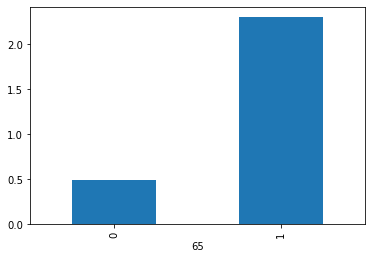

In [68]:
df1['2'].groupby(df1['65']).mean().plot(kind='bar')

In [51]:
#Comparing means of 1's and 0's using column 2 data
G65.count().mean()

3513.5

## Section 3: Machine Learning